# <center>Covid-19 and the World Happiness Report</center>
   ### <center>Data Analysis</center>
***

### Import modules 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('Modules are imported.')

Modules are imported.


###  Importing the Covid-19 dataset

In [2]:
corona_dataset_csv = pd.read_csv('Datasets/covid19_Confirmed_dataset.csv')
corona_dataset_csv.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [3]:
corona_dataset_csv.shape

(266, 104)

### Delete columns

In [6]:
corona_dataset_csv.drop(['Lat', 'Long'], axis=1, inplace=True)

In [7]:
corona_dataset_csv.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


### Aggregating the rows by the country

In [8]:
corona_dataset_agg = corona_dataset_csv.groupby('Country/Region').sum()

In [9]:
corona_dataset_agg.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [10]:
corona_dataset_agg.shape

(187, 100)

### Visualizing data related to China

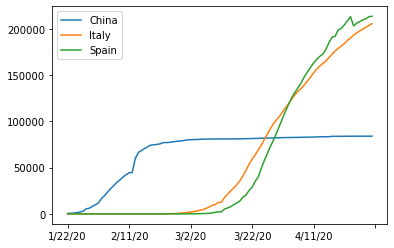

In [16]:
corona_dataset_agg.loc['China'].plot()
corona_dataset_agg.loc['Italy'].plot()
corona_dataset_agg.loc['Spain'].plot()
plt.legend()

### Calculating a good measure 
we need to find a good measure reperestend as a number, describing the spread of the virus in a country. 

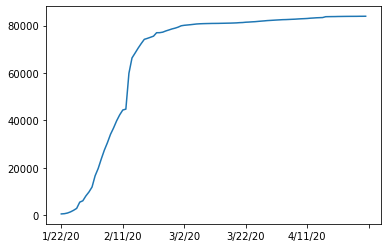

In [18]:
corona_dataset_agg.loc['China'].plot()

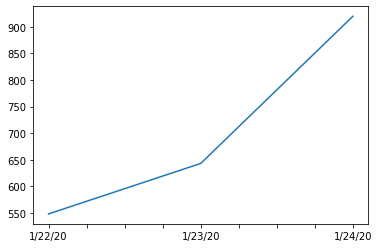

In [20]:
#takes the first 3 elements from the row lable 'china'
corona_dataset_agg.loc['China'][:3].plot()

### Caculating the first derivative of the curve

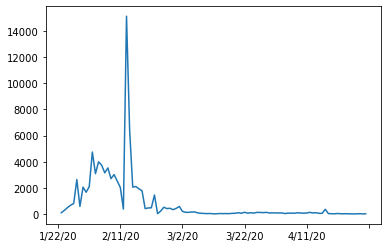

In [21]:
# calculate the difference between consecutive elements
corona_dataset_agg.loc['China'].diff().plot()

### Find maxmimum infection rate for China

In [22]:
#finds that the max number of new cases in a 24 hour period was 15136
corona_dataset_agg.loc['China'].diff().max()

15136.0

In [24]:
corona_dataset_agg.loc['Italy'].diff().max()

6557.0

In [25]:
corona_dataset_agg.loc['Spain'].diff().max()

9630.0

### Find maximum infection rate for all of the countries

In [27]:
# .index is used for the column names
countries = list(corona_dataset_agg.index)
max_infect_rate = []
for c in countries :
    max_infect_rate.append(corona_dataset_agg.loc[c].diff().max())
corona_dataset_agg['max_infect_rate'] = max_infect_rate

In [28]:
corona_dataset_agg.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infect_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


### Create a new dataframe with only needed column 

In [29]:
corona_data = pd.DataFrame(corona_dataset_agg['max_infect_rate'])

In [30]:
corona_data.head()

,max_infect_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


***

# <center>Adding the World Happiness Report</center>

***

### Importing the World Happiness Report dataset

In [32]:
happiness_report_csv = pd.read_csv('Datasets/worldwide_happiness_report.csv')

In [33]:
happiness_report_csv.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### Dropping columns 

In [34]:
useless_cols = ['Overall rank', 'Score', 'Generosity', 'Perceptions of corruption']

In [35]:
happiness_report_csv.drop(useless_cols, axis=1, inplace=True)
happiness_report_csv

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557
...,...,...,...,...,...
151,Rwanda,0.359,0.711,0.614,0.555
152,Tanzania,0.476,0.885,0.499,0.417
153,Afghanistan,0.350,0.517,0.361,0.000
154,Central African Republic,0.026,0.000,0.105,0.225


### Changing the indices of the dataframe

In [36]:
#makes the country column the new index
happiness_report_csv.set_index('Country or region', inplace = True)
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


### Joining the two datasets

#### Corona Dataset :

In [37]:
corona_data.head()

,max_infect_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [38]:
corona_data.shape

(187, 1)

#### wolrd happiness report Dataset :

In [39]:
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [40]:
happiness_report_csv.shape

(156, 4)

In [41]:
data = corona_data.join(happiness_report_csv, how = 'inner')
data.head()

,max_infect_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


### Correlation matrix 

In [42]:
data.corr()

,max_infect_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infect_rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


### Visualization of the results

In [43]:
data.head()

,max_infect_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


### Plotting GDP vs maximum Infection rate

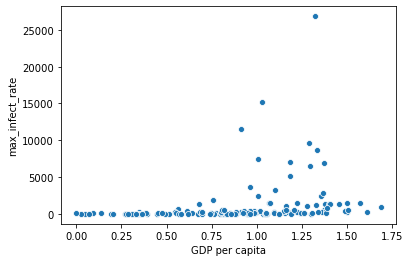

In [44]:
x = data['GDP per capita']
y = data['max_infect_rate']
sns.scatterplot(x,y)

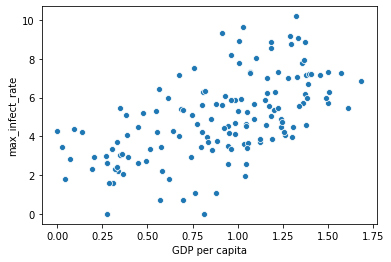

In [45]:
#Since the scale isnt the same, Ill take the log of y
x = data['GDP per capita']
y = data['max_infect_rate']
sns.scatterplot(x, np.log(y))

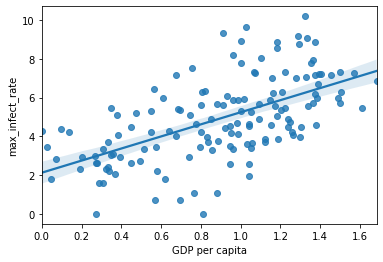

In [46]:
sns.regplot(x, np.log(y))

### Plotting Social support vs maximum Infection rate

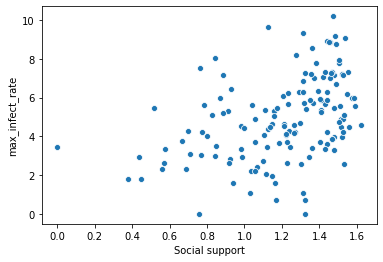

In [47]:
x = data['Social support']
y = data['max_infect_rate']
sns.scatterplot(x, np.log(y))

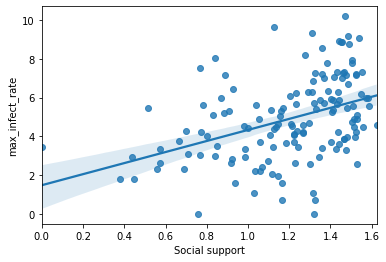

In [48]:
sns.regplot(x, np.log(y))

### Plotting Healthy life expectancy vs maximum Infection rate

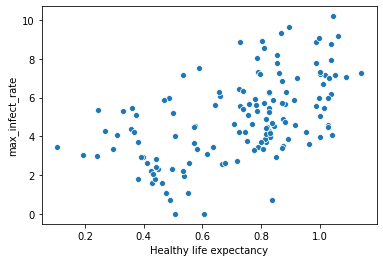

In [49]:
x = data['Healthy life expectancy']
y = data['max_infect_rate']
sns.scatterplot(x, np.log(y))

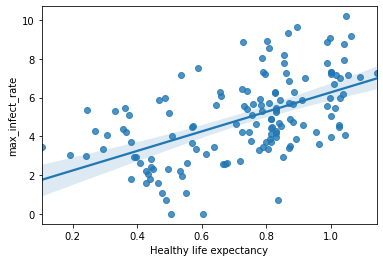

In [50]:
sns.regplot(x, np.log(y))

### Plotting Freedom to make life choices vs maximum Infection rate

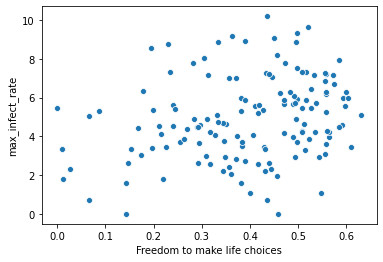

In [51]:
x = data['Freedom to make life choices']
y = data['max_infect_rate']
sns.scatterplot(x, np.log(y))

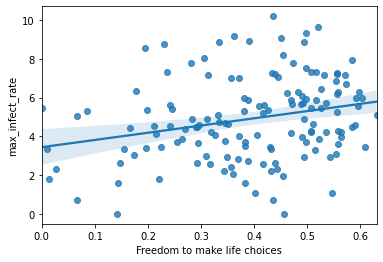

In [52]:
sns.regplot(x, np.log(y))

### Conclusion

People who are living in developed countries are more prone to getting Covid-19 compared to people living in less developed countries.